cv2.TM_CCOEFF_NORMED -0.5316528677940369 0.5024503469467163 (1029, 340) (721, 328)
cv2.TM_CCORR_NORMED 0.5819324254989624 0.9561604857444763 (785, 245) (558, 669)
cv2.TM_SQDIFF_NORMED 0.0952724888920784 1.0 (251, 653) (801, 212)


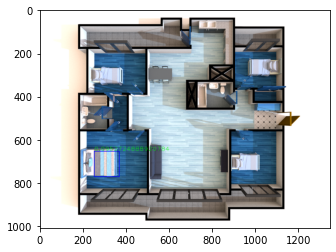

In [7]:


# 템플릿 매칭으로 객체 위치 검출 (template_matching.py)

import matplotlib.pyplot as plt
import cv2
import numpy as np

# 입력이미지와 템플릿 이미지 읽기
img = cv2.imread('/Users/reejungkim/Documents/Git/ImgProcessor/img/to_label/6_20.png')
template = cv2.imread('/Users/reejungkim/Documents/Git/ImgProcessor/img/src.png')
th, tw = template.shape[:2]
cv2.imshow('template', template)

# 3가지 매칭 메서드 순회
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', \
                                     'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
    img_draw = img.copy()
    method = eval(method_name)
    # 템플릿 매칭   ---①
    res = cv2.matchTemplate(img, template, method)
    # 최솟값, 최댓값과 그 좌표 구하기 ---②
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(method_name, min_val, max_val, min_loc, max_loc)

    # TM_SQDIFF의 경우 최솟값이 좋은 매칭, 나머지는 그 반대 ---③
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    # 매칭 좌표 구해서 사각형 표시   ---④      
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
    # 매칭 포인트 표시 ---⑤
    cv2.putText(img_draw, str(match_val), top_left, \
                cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
    #cv2.imshow(method_name, img_draw)
plt.imshow(img_draw)